In [94]:
# Dependency List
# xlrd
# pandas
# numpy
# matplotlib
# geopandas


In [95]:

import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

data = pd.read_csv('data/data.csv')
animals_csv = pd.read_csv('data/animals.csv')
data_copy = data.copy()
data

,Region,Year,p elephant,p tigers.,p leopards.,p bears.,p Wolves.,p hyenas.,p wild Beasts.,p snakes.,c elephant,c tigers.,c leopards.,c bears.,c Wolves.,c hyenas.,c wild Beasts.,c snakes.
0,Bengal,1875,8,363,106,27,160,8,1435,8807,0,1958,"2,428",93,876,886,1209,697
1,Bengal,1876,9,439,67,52,185,27,662,8548,0,2516,1694,28,900,773,1421,4600
2,Bengal,1877,11,378,69,26,149,9,614,8879,4,3631,2320,29,1280,693,1403,969
3,Bengal,1878,5,347,149,37,152,21,663,9944,2,3483,2304,24,1316,2263,1516,537
4,Bengal,1879,8,271,105,48,83,10,739,9515,2,3532,2812,27,1608,1164,2147,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Madras,1890,0,111,42,12,2,1,7,1424,0,2453,6439,41,497,454,269,1852
196,Madras,1891,1,152,39,5,4,0,78,1433,1,2212,6481,19,356,309,388,1317
197,Madras,1892,1,211,55,12,1,0,36,1455,1,2316,6081,9,367,330,782,1458
198,Madras,1893,1,192,50,10,7,3,11,1498,15,3212,7765,103,543,311,284,2019


In [96]:
# changing the region names to fit india map

data['Region'] = data['Region'].replace('N. W. Provinces', 'Uttar Pradesh')
data['Region'] = data['Region'].replace('Central Provinces', 'Madhya Pradesh')
data['Region'] = data['Region'].replace('Ajmere and Mhairwara', 'Rajasthan')
data['Region'] = data['Region'].replace('Burma', 'Myanmar')
data['Region'] = data['Region'].replace('Berar', 'Madhya Pradesh')
data['Region'] = data['Region'].replace('Bombay', 'Maharashtra')
data['Region'] = data['Region'].replace('Madras', 'Tamil Nadu')

data

,Region,Year,p elephant,p tigers.,p leopards.,p bears.,p Wolves.,p hyenas.,p wild Beasts.,p snakes.,c elephant,c tigers.,c leopards.,c bears.,c Wolves.,c hyenas.,c wild Beasts.,c snakes.
0,Bengal,1875,8,363,106,27,160,8,1435,8807,0,1958,"2,428",93,876,886,1209,697
1,Bengal,1876,9,439,67,52,185,27,662,8548,0,2516,1694,28,900,773,1421,4600
2,Bengal,1877,11,378,69,26,149,9,614,8879,4,3631,2320,29,1280,693,1403,969
3,Bengal,1878,5,347,149,37,152,21,663,9944,2,3483,2304,24,1316,2263,1516,537
4,Bengal,1879,8,271,105,48,83,10,739,9515,2,3532,2812,27,1608,1164,2147,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Tamil Nadu,1890,0,111,42,12,2,1,7,1424,0,2453,6439,41,497,454,269,1852
196,Tamil Nadu,1891,1,152,39,5,4,0,78,1433,1,2212,6481,19,356,309,388,1317
197,Tamil Nadu,1892,1,211,55,12,1,0,36,1455,1,2316,6081,9,367,330,782,1458
198,Tamil Nadu,1893,1,192,50,10,7,3,11,1498,15,3212,7765,103,543,311,284,2019


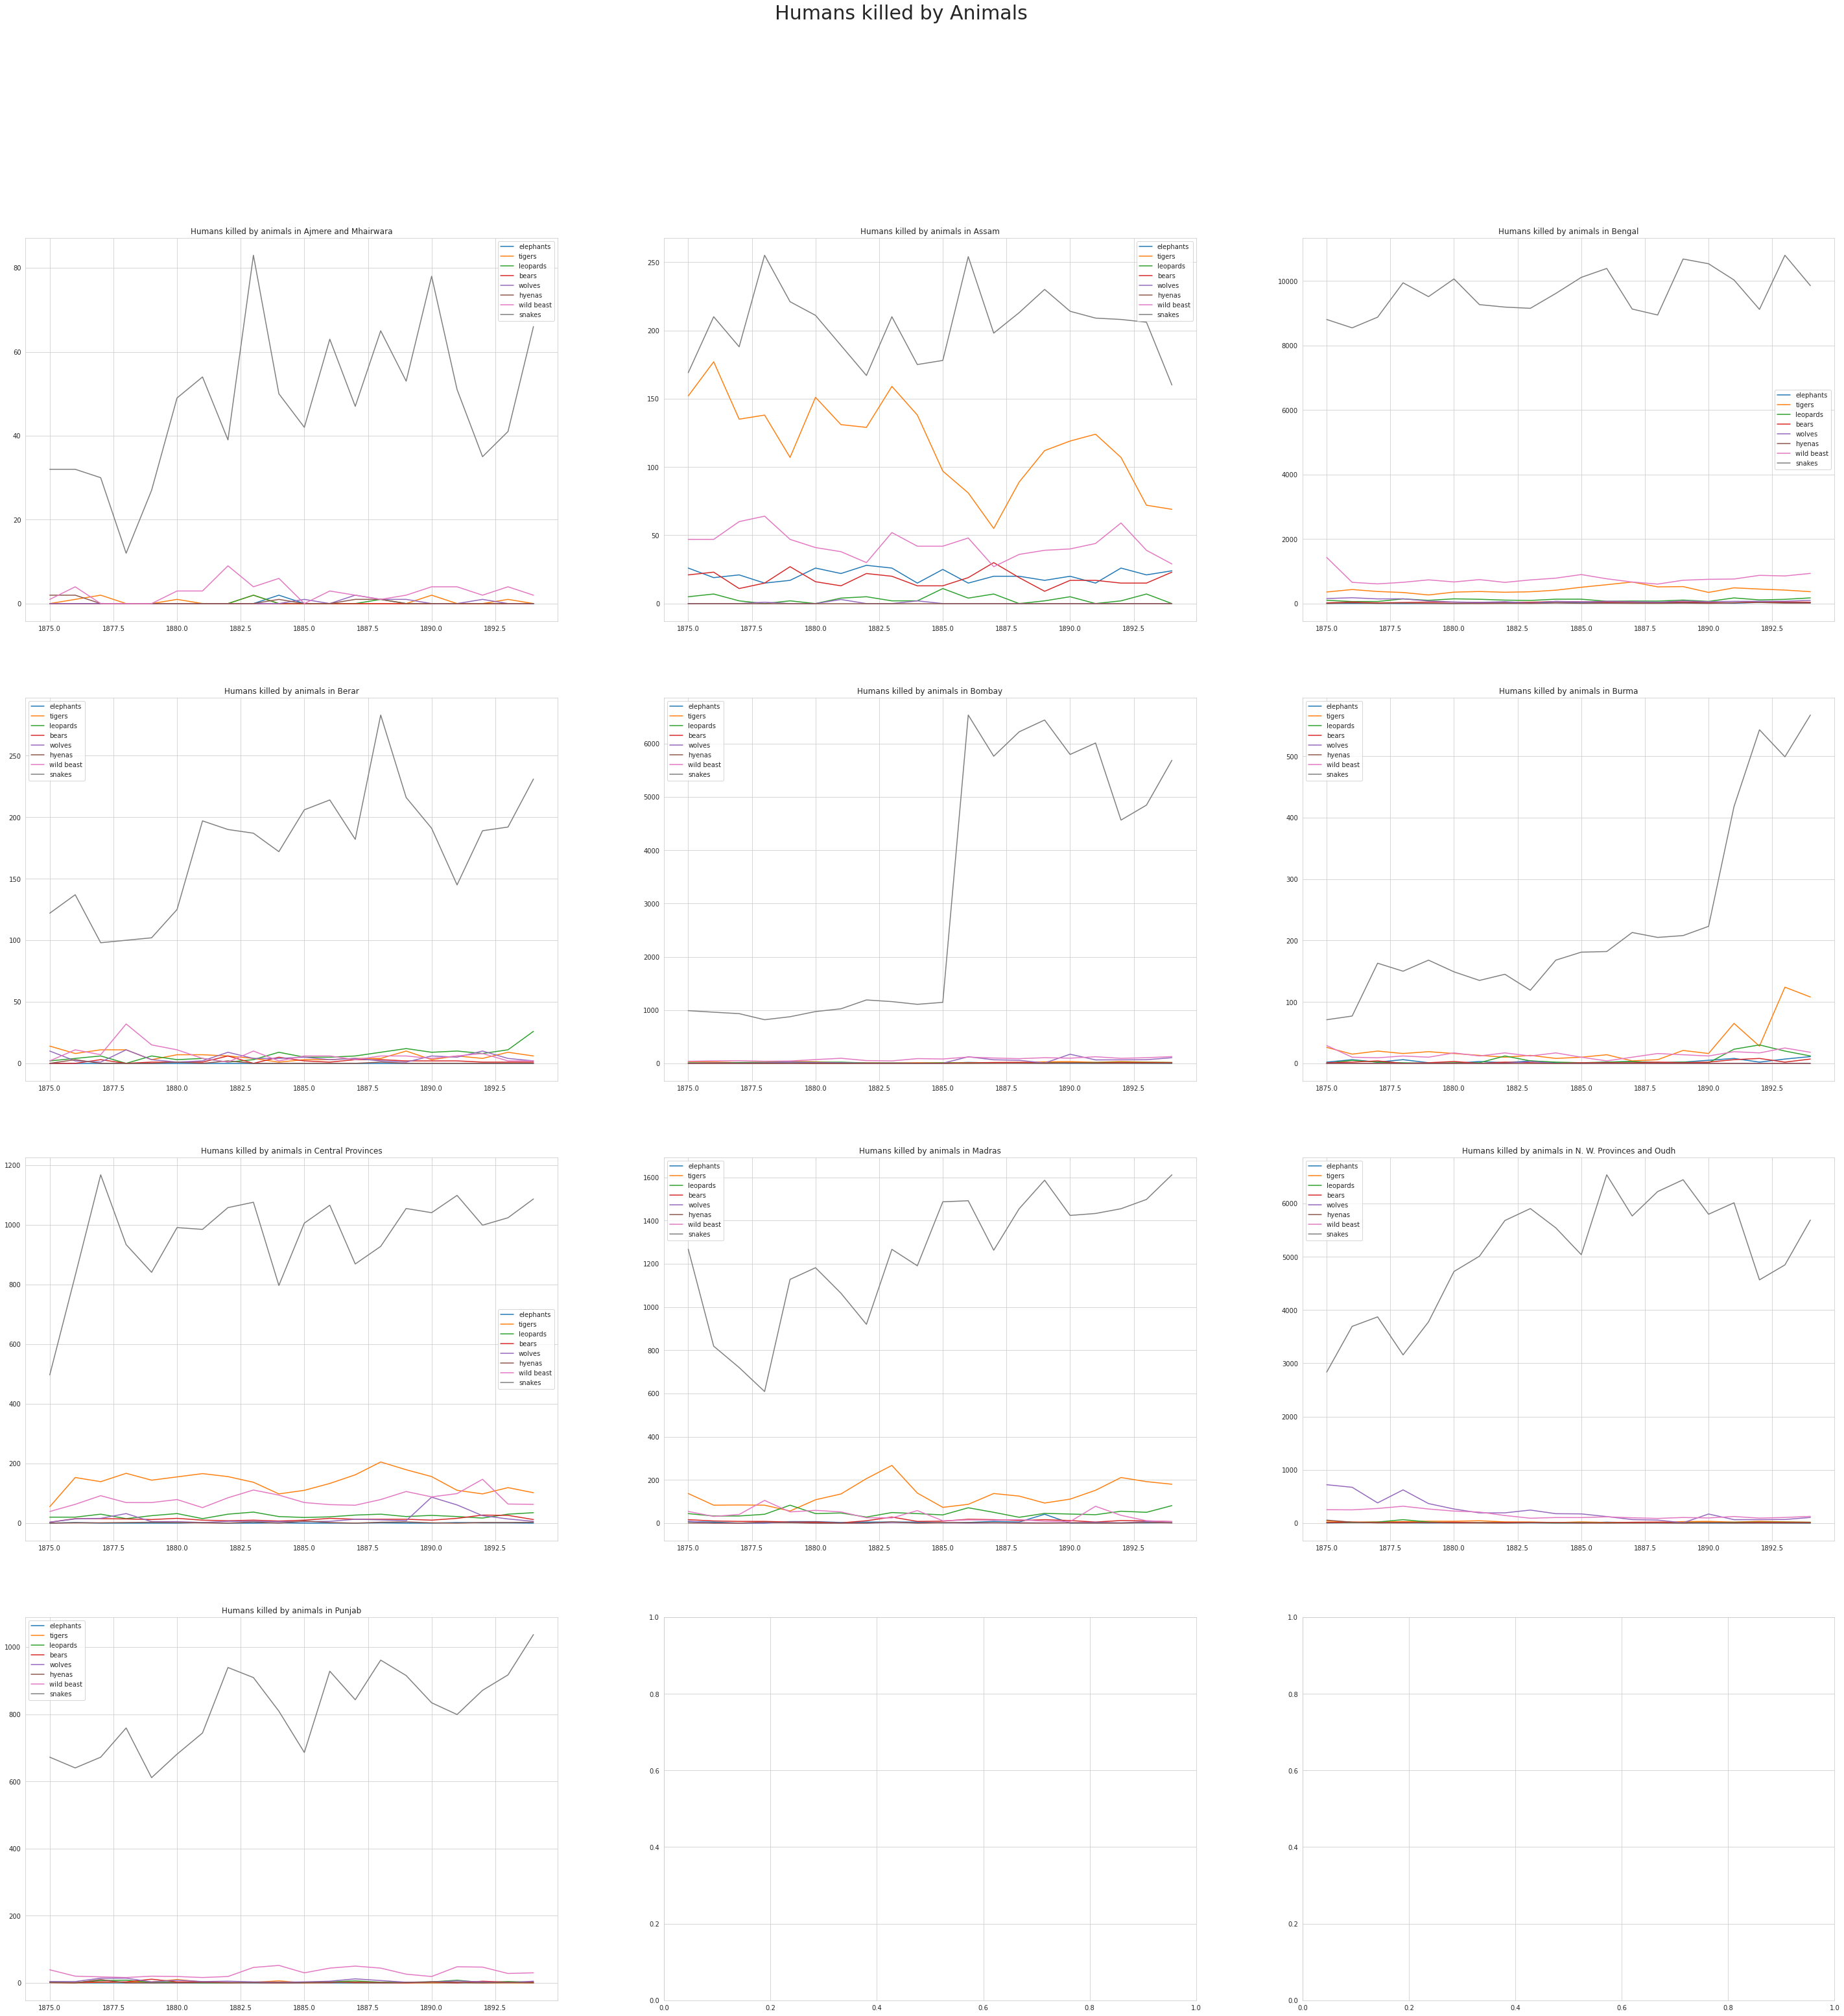

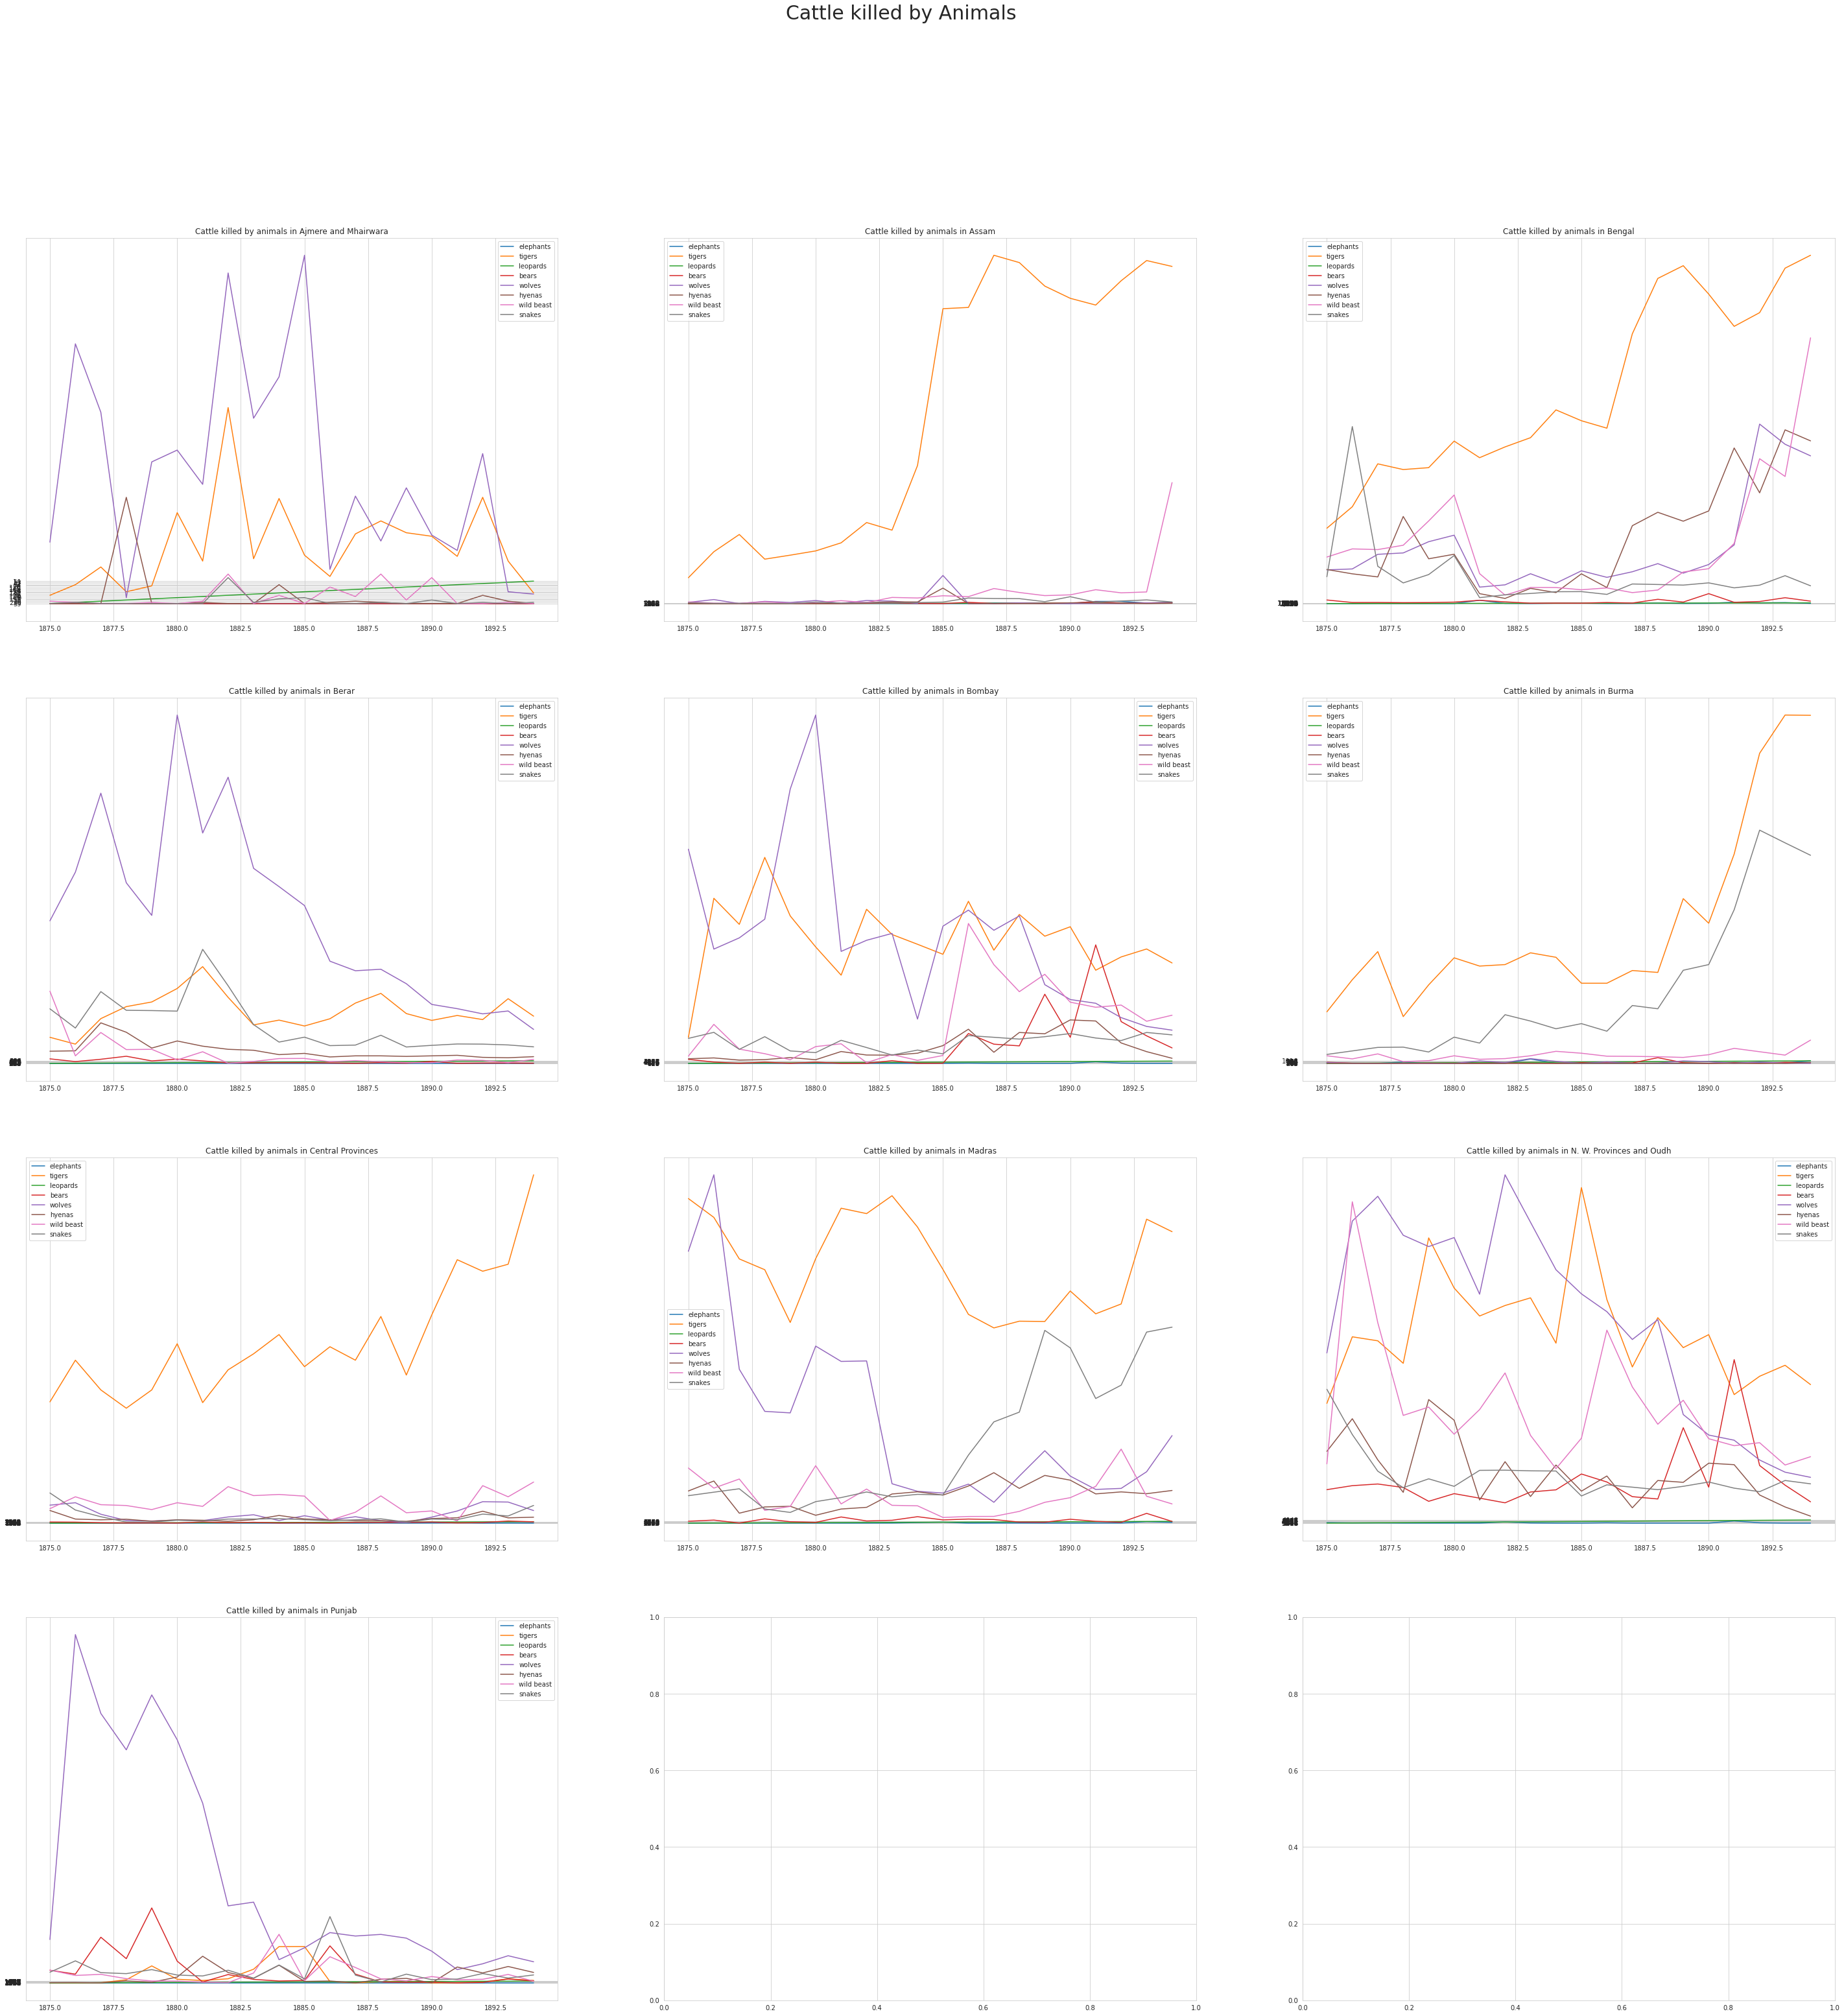

In [97]:
# grouping data based on region
data_grouped = data_copy.groupby('Region')
animals_grouped = animals_csv.groupby(animals_csv.columns[0])

animals = [ "elephants", "tigers", "leopards", "bears", "wolves", "hyenas", "wild beast", "snakes" ]
locations = [ "Bengal", "Assam", "N. W. Provinces and Oudh", "Punjab", "Central Provinces", "Burma", "Ajmere and Mhairwara", "Berar", "Madras", "Bombay" ]

# iterate through the groups and plot subplots
fig, axes = plt.subplots(4, 3, figsize=(50, 50))
# set name of the figure
fig.suptitle('Humans killed by Animals', fontsize=30)
for i, (name, group) in enumerate(data_grouped):
    ax = axes[i // 3, i % 3]
    ax.set_title("Humans killed by animals in " + name)
    for j in range(2,10):
        ax.plot(group['Year'], group.iloc[:,j], label=animals[j-2])
        ax.legend()

fig2, axes2 = plt.subplots(4, 3, figsize=(50, 50))
fig2.suptitle('Cattle killed by Animals', fontsize=30)
for i, (name, group) in enumerate(data_grouped):
    ax = axes2[i // 3, i % 3]
    ax.set_title("Cattle killed by animals in " + name)
    for j in range(10,18):
        ax.plot(group['Year'], group.iloc[:,j], label=animals[j-10])
        ax.legend()

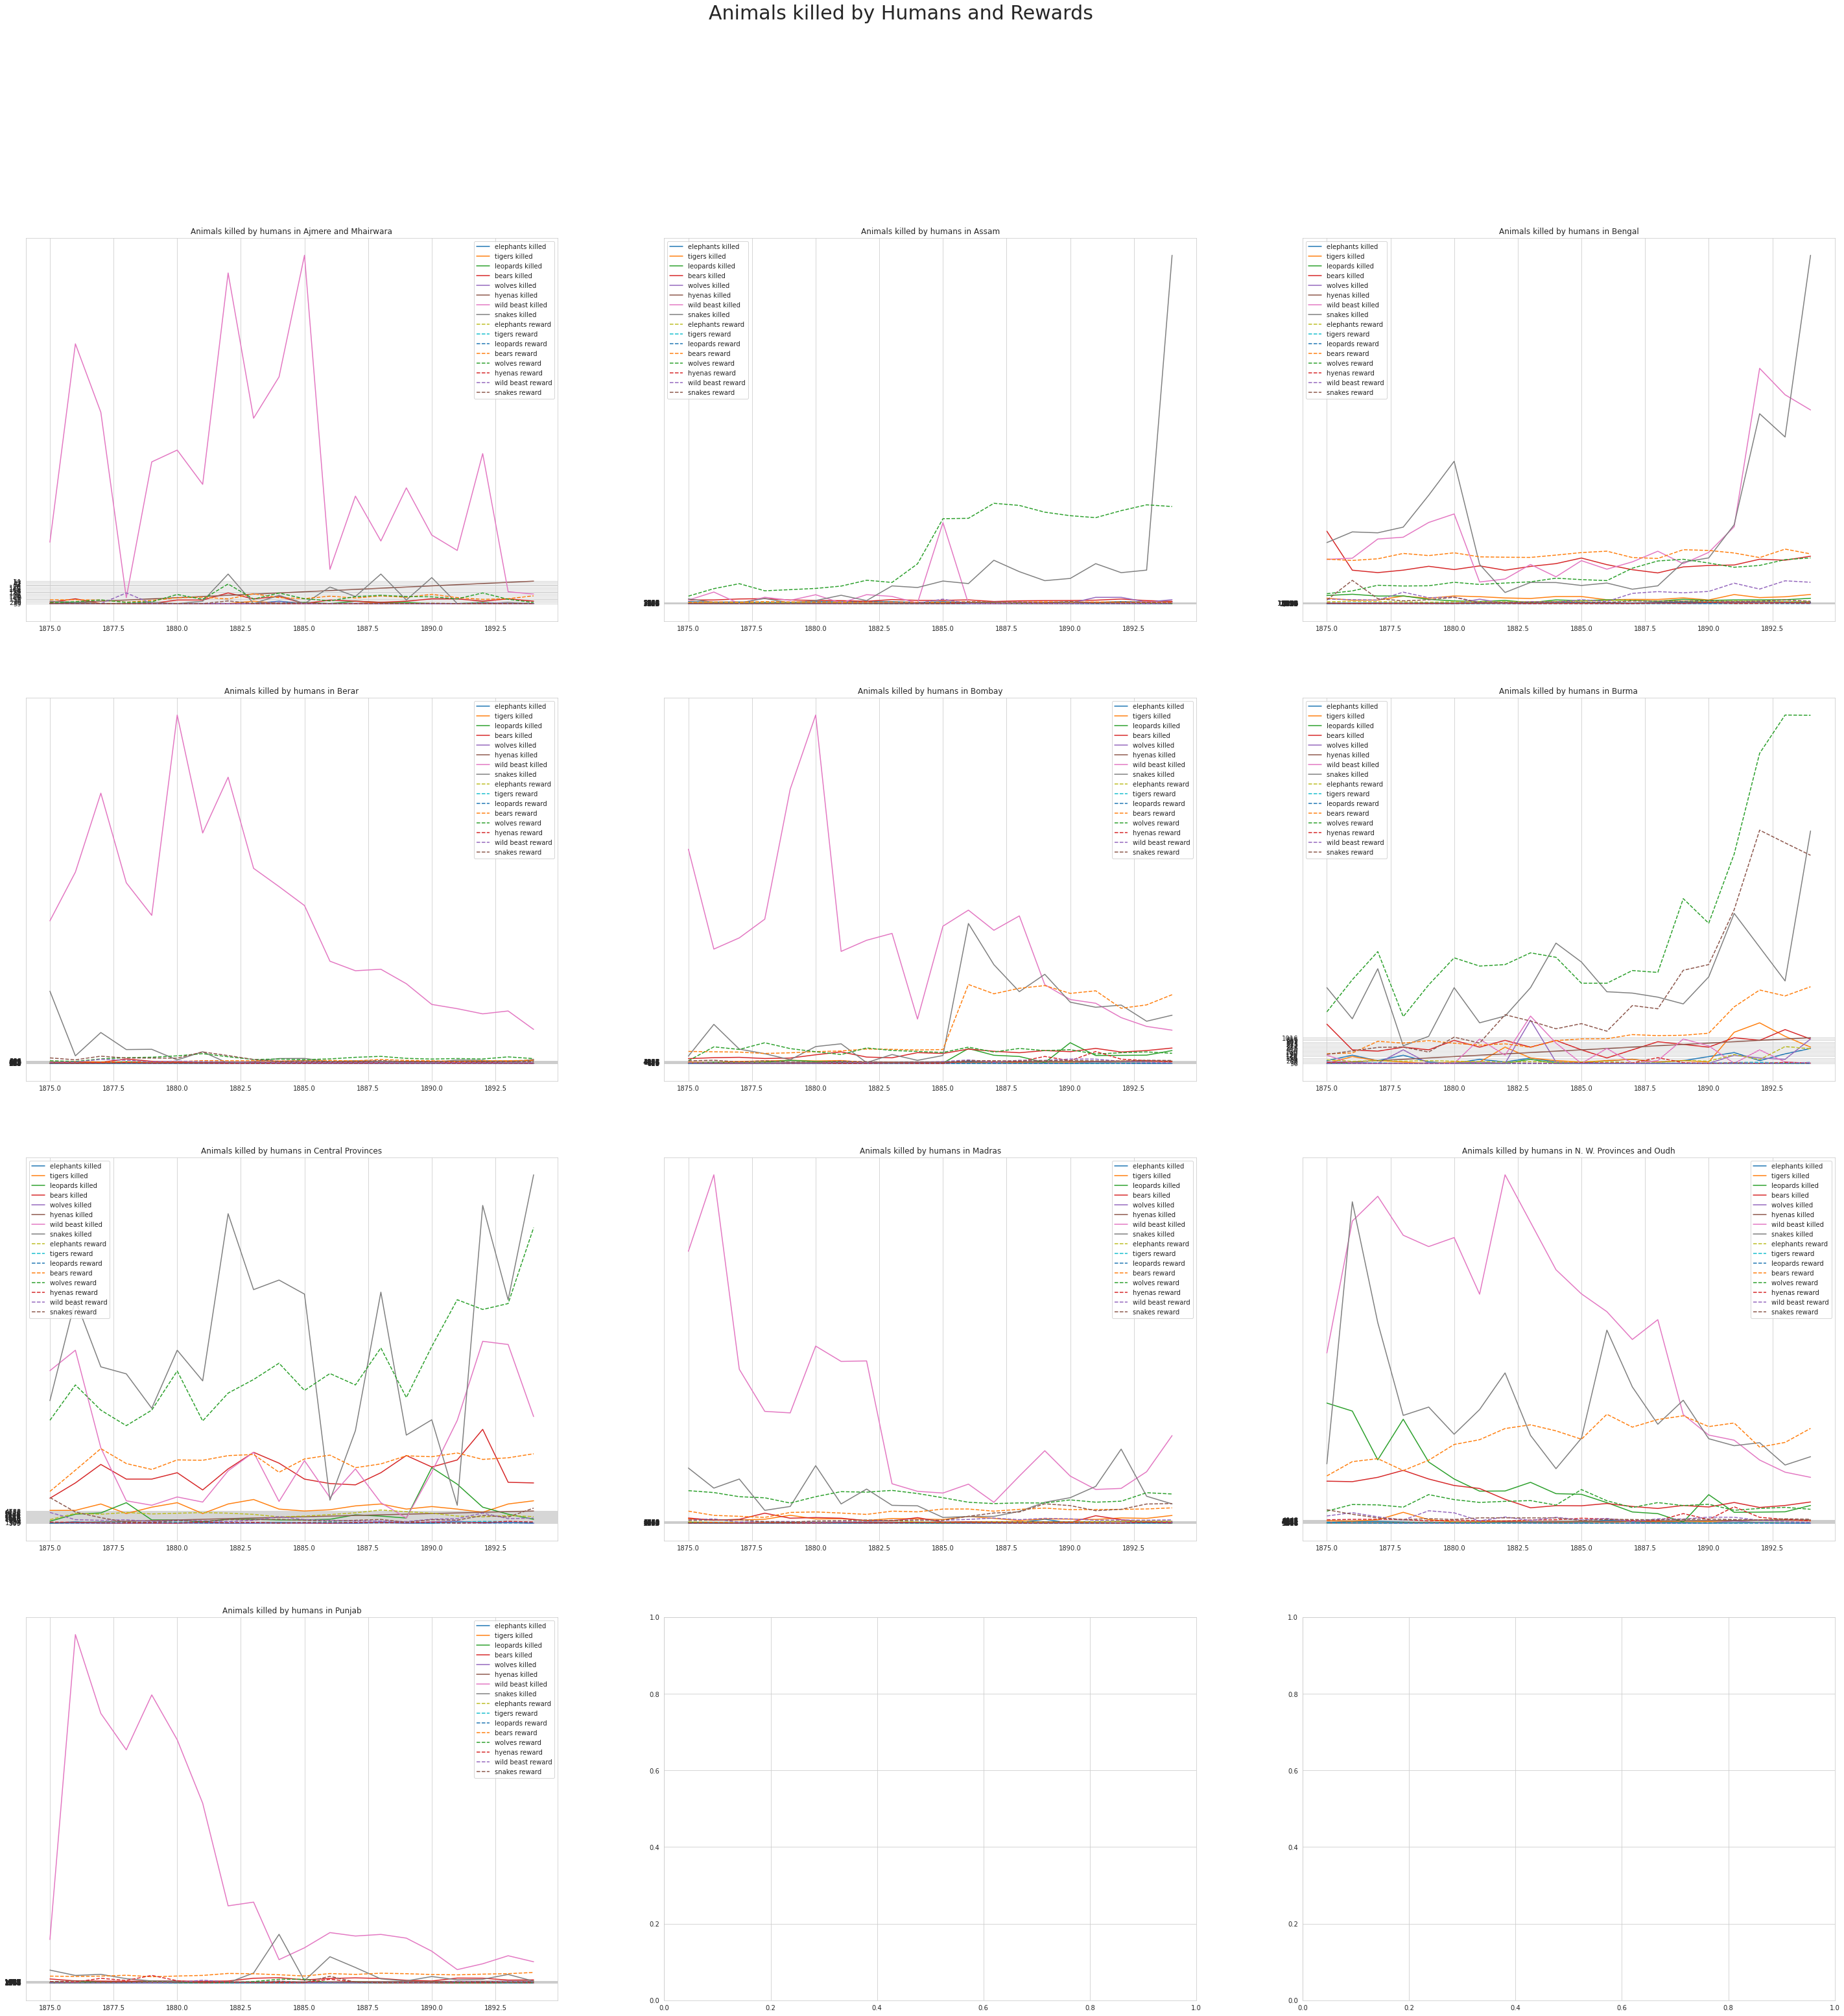

In [98]:
fig3, axes3 = plt.subplots(4, 3, figsize=(50, 50))
fig3.suptitle('Animals killed by Humans and Rewards', fontsize=30)
for i, (name, group) in enumerate(data_grouped):
    ax = axes3[i // 3, i % 3]
    ax.set_title("Animals killed by humans in " + name)
    for j in range(2,18,2):
        ax.plot(group.iloc[:,1], group.iloc[:,j], label=animals[j//2-1] + " killed")    
    for j in range(3,18,2):
        ax.plot(group.iloc[:,1], group.iloc[:,j] / 10, label=animals[j//2-1] + " reward", linestyle='dashed')
    ax.legend()

In [99]:
# use geopandas to read the shapefile
world = gpd.read_file('data/india-polygon.shp')
world

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
6,None,Dadra and Nagar Haveli,"POLYGON ((73.20640 20.12165, 73.20865 20.10695..."
7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
8,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698..."
9,None,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23..."


In [100]:
# Joining the two tables based on region
merged = world.set_index('st_nm').join(data.set_index('Region'))
# iterate through all columns and replace NaN with 0
for i in merged.columns:
    merged[i] = merged[i].fillna(0)
merged

,id,geometry,Year,p elephant,p tigers.,p leopards.,p bears.,p Wolves.,p hyenas.,p wild Beasts.,p snakes.,c elephant,c tigers.,c leopards.,c bears.,c Wolves.,c hyenas.,c wild Beasts.,c snakes.
Andaman and Nicobar Islands,0,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
Andhra Pradesh,0,"POLYGON ((81.10545 17.82313, 81.39342 17.81473...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
Arunachal Pradesh,0,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
Assam,0,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",1875.0,26.0,152.0,5.0,21.0,0.0,0.0,47.0,169.0,1.0,968.0,167,0.0,45.0,2.0,61.0,34.0
Assam,0,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",1876.0,19.0,177.0,7.0,23.0,0.0,0.0,47.0,210.0,0.0,1940.0,428,0.0,150.0,0.0,16.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Telangana,0,"POLYGON ((81.05595 17.79162, 81.05820 17.75380...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
Tripura,0,"POLYGON ((92.23295 24.50229, 92.27345 24.38673...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
Uttar Pradesh,0,"POLYGON ((80.07054 28.82830, 80.37201 28.63290...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
Uttarakhand,0,"POLYGON ((80.07054 28.82830, 80.00079 28.71064...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [101]:
# create new dataframe to hold average values of each region over the years
data_avg = pd.DataFrame(columns=['Region', 'avg elephant', 'avg tiger', 'avg leopard', 'avg bear', 'avg wolf', 'avg hyena', 'avg wild beast', 'avg snake'])

# iterate through the groups and calculate the average
for i, (name, group) in enumerate(data_grouped):
    data_avg.loc[i] = [name, group.iloc[:,2].mean(), group.iloc[:,3].mean(), group.iloc[:,4].mean(), group.iloc[:,5].mean(), group.iloc[:,6].mean(), group.iloc[:,7].mean(), group.iloc[:,8].mean(), group.iloc[:,9].mean()]


data_avg['Region'] = data_avg['Region'].replace('N. W. Provinces', 'Uttar Pradesh')
data_avg['Region'] = data_avg['Region'].replace('Central Provinces', 'Madhya Pradesh')
data_avg['Region'] = data_avg['Region'].replace('Ajmere and Mhairwara', 'Rajasthan')
data_avg['Region'] = data_avg['Region'].replace('Burma', 'Myanmar')
data_avg['Region'] = data_avg['Region'].replace('Berar', 'Madhya Pradesh')
data_avg['Region'] = data_avg['Region'].replace('Bombay', 'Maharashtra')
data_avg['Region'] = data_avg['Region'].replace('Madras', 'Tamil Nadu')

# Joining the two tables based on region
merged_avg = world.set_index('st_nm').join(data_avg.set_index('Region'))
for i in merged_avg.columns:
    merged_avg[i] = merged_avg[i].fillna(0)
merged_avg


,id,geometry,avg elephant,avg tiger,avg leopard,avg bear,avg wolf,avg hyena,avg wild beast,avg snake
Andaman and Nicobar Islands,0,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Andhra Pradesh,0,"POLYGON ((81.10545 17.82313, 81.39342 17.81473...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arunachal Pradesh,0,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Assam,0,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",20.90,117.10,3.35,17.90,0.30,0.00,43.55,203.25
Bihar,0,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chandigarh,0,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chhattisgarh,0,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dadra and Nagar Haveli,0,"POLYGON ((73.20640 20.12165, 73.20865 20.10695...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Daman and Diu,0,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delhi,0,"POLYGON ((77.19755 28.86191, 77.33703 28.67912...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


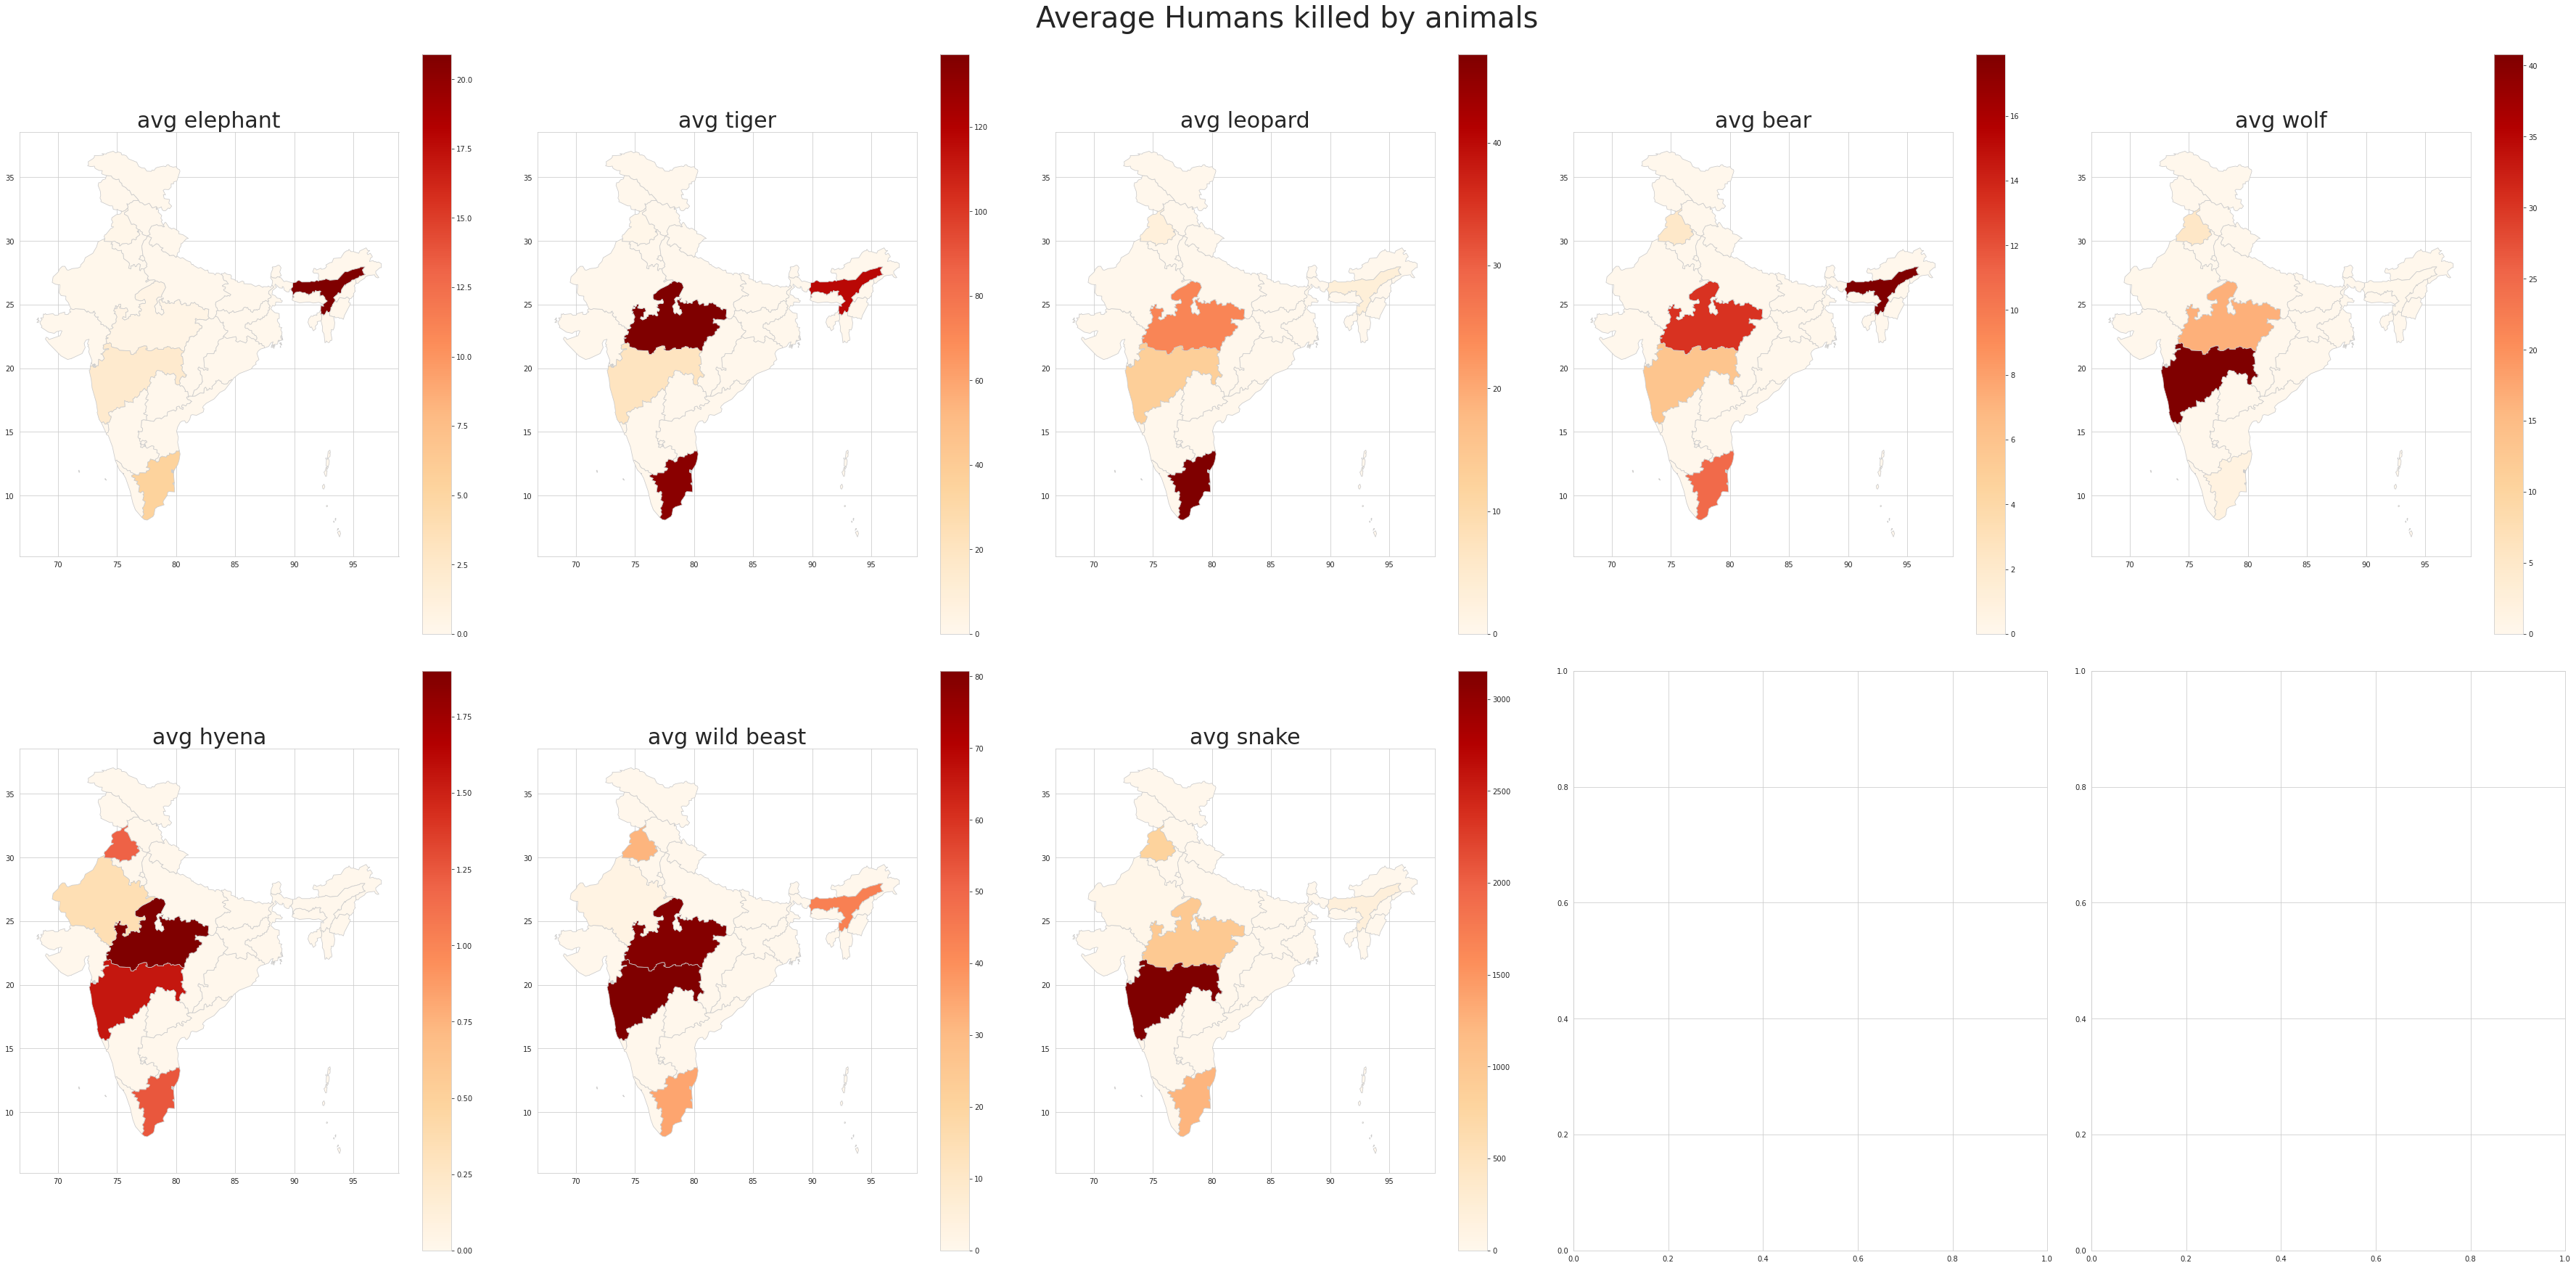

In [102]:
# Create subplot for years from 1875 to 1894
fig, ax = plt.subplots(2, 5, figsize=(50, 25))
fig.suptitle('Average Humans killed by animals', fontsize=40)
fig.tight_layout(pad=3.0)

# iterate over columns and plot on map
for i in range(2,10):
    merged_avg.plot(column=merged_avg.columns[i], cmap='OrRd', linewidth=0.8, ax=ax[(i-2)//5, (i-2)%5], edgecolor='0.8', legend=True)
    ax[(i-2)//5, (i-2)%5].set_title(merged_avg.columns[i], fontsize=30)
